In [58]:
# import dependencies
%matplotlib notebook
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [59]:
master_df = pd.read_csv('Master_DF2.csv')
master_df.head()


,State,Region,2013_Pop,2013_RX_rate,2013Deaths,2014_Pop,2014_RX_rate,2014Deaths,2015_Pop,2015_RX_rate,2015Deaths,2016_Pop,2016_RX_rate,2016Deaths,2017_Pop,2017_RX_rate,2017Deaths
0,AL,Southeast,4827660,142.4,12.39,4840037,135.2,14.94,4850858,125.0,15.17,4860545,121.0,15.55,4874747,107.2,17.13
1,AK,Far West,736760,63.7,14.25,736759,62.7,16.83,737979,60.8,16.53,741522,58.9,17.26,739795,52.0,19.87
2,AZ,Southwest,6616124,80.4,18.47,6706435,79.7,18.06,6802262,75.5,18.73,6908642,70.2,20.00,7016270,61.2,21.83
3,AR,Southeast,2956780,120.9,10.79,2964800,123.2,12.01,2975626,117.2,13.17,2988231,114.6,13.42,3004279,105.4,14.85
4,CA,Far West,38347383,54.4,11.61,38701278,52.7,11.68,39032444,47.7,11.94,39296476,44.8,11.84,39536653,39.5,12.31


In [60]:
#sum just regional rx & deaths over the years
reg2013_RX_rate = round((master_df.groupby(['Region']).mean()['2013_RX_rate']), 2)
reg2014_RX_rate = round((master_df.groupby(['Region']).mean()['2014_RX_rate']), 2)
reg2015_RX_rate = round((master_df.groupby(['Region']).mean()['2015_RX_rate']), 2)
reg2016_RX_rate = round((master_df.groupby(['Region']).mean()['2016_RX_rate']), 2)
reg2017_RX_rate = round((master_df.groupby(['Region']).mean()['2017_RX_rate']), 2)
reg2013Deaths = round((master_df.groupby(['Region']).mean()['2013Deaths']), 2)
reg2014Deaths = round((master_df.groupby(['Region']).mean()['2014Deaths']), 2)
reg2015Deaths = round((master_df.groupby(['Region']).mean()['2015Deaths']), 2)
reg2016Deaths = round((master_df.groupby(['Region']).mean()['2016Deaths']), 2)
reg2017Deaths = round((master_df.groupby(['Region']).mean()['2017Deaths']), 2)
reg2013_RX_rate
#reg2017Deaths

Region
Far West           71.33
Great Lakes        87.16
Mideast            64.90
New England        71.23
Plains             72.07
Rocky Mountain     81.64
Southeast         108.29
Southwest          86.28
Name: 2013_RX_rate, dtype: float64

In [69]:
reg_Rx = pd.DataFrame({'2013_RX': reg2013_RX_rate, '2014_RX':reg2014_RX_rate, '2015_RX': reg2015_RX_rate,
                      '2016_RX': reg2016_RX_rate, '2017_RX': reg2017_RX_rate,})
reg_Rx_avg = reg_Rx.mean(axis=1)
reg_Rx_avg

Region
Far West          64.392
Great Lakes       76.872
Mideast           58.406
New England       62.768
Plains            65.244
Rocky Mountain    73.468
Southeast         97.636
Southwest         76.668
dtype: float64

In [70]:
reg_OD = pd.DataFrame({'2013_OD': reg2013Deaths, '2014_OD':reg2014Deaths, '2015_OD': reg2015Deaths,
                      '2016_OD': reg2016Deaths, '2017_OD': reg2017Deaths})
reg_OD_avg = reg_OD.mean(axis=1)
reg_OD_avg

Region
Far West          15.014
Great Lakes       21.014
Mideast           23.298
New England       23.688
Plains            10.406
Rocky Mountain    15.942
Southeast         19.038
Southwest         18.282
dtype: float64

<IPython.core.display.Javascript object>


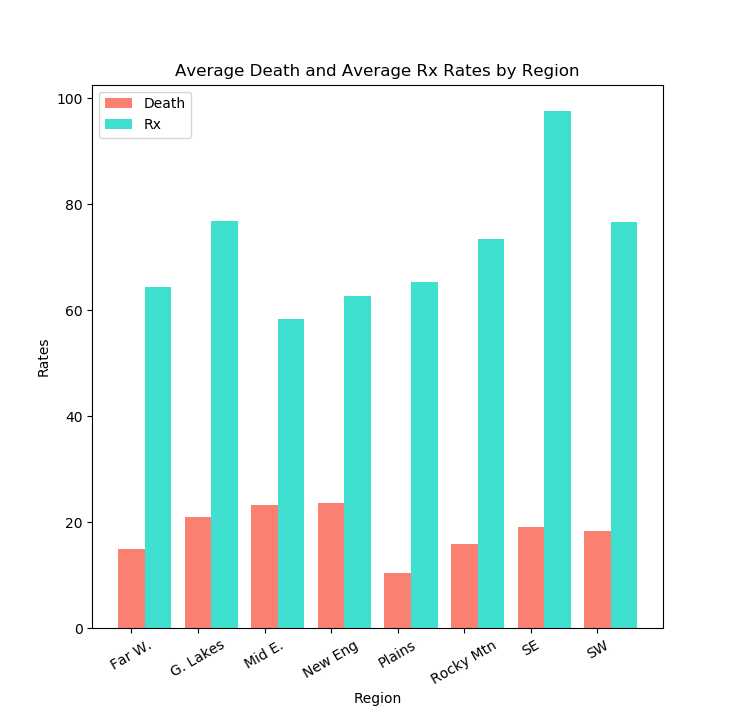

In [79]:
#plot in a bar graph
allyrs = [75.07, 105.07, 116.49, 118.44, 52.03, 79.71, 95.19, 91.41] 
x_axis = np.arange(len(allyrs))

plt.bar(x_axis+0, reg_OD_avg, color='salmon', width=0.4)
plt.bar(x_axis+0.4, reg_Rx_avg, color="turquoise", width=0.4)

plt.title("Average Death and Average Rx Rates by Region")
plt.xlabel("Region")
plt.ylabel("Rates")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Far W.", "G. Lakes", "Mid E.", "New Eng", "Plains", "Rocky Mtn", "SE", "SW"], rotation = 30)

Data = ['Death', 'Rx']
plt.legend(Data)


In [80]:
plt.savefig("DeathandRxAvgs.png")
plt.show()